In [ ]:
#Import all needed Packages
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import math
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras


# Data Init

In [ ]:
#The Data
uploaded = 'https://raw.githubusercontent.com/kritzerenkrieg/dataset_NTT/main/NTT%202015%20-%202022.csv'

In [ ]:
# Get the data
df = pd.read_csv(uploaded, index_col='datetime', parse_dates=['datetime'])
print(df.head(6))
df['total_visitor'] = df['total_visitor'].replace(39.1, 39100)
df.head(10)

            total_visitor  total_accomodation
datetime                                     
2014-01-01        22881.0                9024
2014-02-01        19794.0                9058
2014-03-01        26642.0                9103
2014-04-01        33478.0                9187
2014-05-01        36289.0                9247
2014-06-01           39.1                9271


,total_visitor,total_accomodation
datetime,,
2014-01-01,22881.0,9024
2014-02-01,19794.0,9058
2014-03-01,26642.0,9103
2014-04-01,33478.0,9187
2014-05-01,36289.0,9247
2014-06-01,39100.0,9271
2014-07-01,41911.0,9348
2014-08-01,44722.0,9378
2014-09-01,47533.0,9400


In [ ]:
# Check the data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_visitor       108 non-null    float64
 1   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [ ]:
# Check if the data has nulls
df.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

# LSTM (80:20) Training

In [ ]:
# The Data Shape
df.shape

(108, 2)

In [ ]:
# Splitting the data
test_split=round(len(df)*0.2)
df_for_training=df[:-test_split]
df_for_testing=df[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(86, 2)
(22, 2)


In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_scaled = scaler.transform(df)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[3.53981343e-01, 0.00000000e+00],
       [3.06223797e-01, 7.53379127e-03],
       [4.12166030e-01, 1.75049856e-02],
       [5.17922616e-01, 3.61178817e-02],
       [5.61410294e-01, 4.94128074e-02],
       [6.04897972e-01, 5.47307778e-02],
       [6.48385650e-01, 7.17925992e-02],
       [6.91873327e-01, 7.84400620e-02],
       [7.35361005e-01, 8.33148682e-02],
       [7.78848683e-01, 1.04365167e-01],
       [8.22336360e-01, 1.10569466e-01],
       [8.65824038e-01, 1.20097496e-01],
       [4.21649469e-01, 1.39375138e-01],
       [3.80915546e-01, 1.56436960e-01],
       [4.71743065e-01, 1.69953468e-01],
       [5.78041121e-01, 1.77930423e-01],
       [6.21219388e-01, 1.86350543e-01],
       [6.64397655e-01, 1.94549080e-01],
       [7.07575922e-01, 2.04298693e-01],
       [7.50754189e-01, 2.08065588e-01],
       [7.93932456e-01, 2.13605141e-01],
       [8.37141664e-01, 2.23576335e-01],
       [8.80288990e-01, 2.32218037e-01],
       [9.23467257e-01, 2.38200753e-01],
       [4.691594

In [ ]:
# Creating the X & Y
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,12)
testX,testY=createXY(df_for_testing_scaled,12)


In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (74, 12, 2)
trainY Shape--  (74,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.35398134 0.        ]
 [0.3062238  0.00753379]
 [0.41216603 0.01750499]
 [0.51792262 0.03611788]
 [0.56141029 0.04941281]
 [0.60489797 0.05473078]
 [0.64838565 0.0717926 ]
 [0.69187333 0.07844006]
 [0.735361   0.08331487]
 [0.77884868 0.10436517]
 [0.82233636 0.11056947]
 [0.86582404 0.1200975 ]]
trainY[0]--  0.42164946858707586


In [ ]:
# to reset model
model = 0
model

0

In [ ]:
# Build the LSTM model
model = Sequential()

# Add Layers
model.add(LSTM(80, activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Summary of the Model
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_117 (LSTM)             (None, 12, 80)            26560     
                                                                 
 dropout_15 (Dropout)        (None, 12, 80)            0         
                                                                 
 lstm_118 (LSTM)             (None, 120)               96480     
                                                                 
 dropout_16 (Dropout)        (None, 120)               0         
                                                                 
 dense_60 (Dense)            (None, 1)                 121       
                                                                 
Total params: 123161 (481.10 KB)
Trainable params: 123161 (481.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# To reset history
history = 0

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 [==============================] - 3s 395ms/step - loss: 0.3303 - val_loss: 0.0054
Epoch 2/100
2/2 [==============================] - 0s 52ms/step - loss: 0.2658 - val_loss: 0.0157
Epoch 3/100
2/2 [==============================] - 0s 55ms/step - loss: 0.2070 - val_loss: 0.0436
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 0.1324 - val_loss: 0.1024
Epoch 5/100
2/2 [==============================] - 0s 55ms/step - loss: 0.0745 - val_loss: 0.2166
Epoch 6/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0673 - val_loss: 0.2903
Epoch 7/100
2/2 [==============================] - 0s 55ms/step - loss: 0.0947 - val_loss: 0.2211
Epoch 8/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0757 - val_loss: 0.1388
Epoch 9/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0542 - val_loss: 0.0884
Epoch 10/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0523 - val_loss: 0.0613
Epoch 11/100
2/2 [

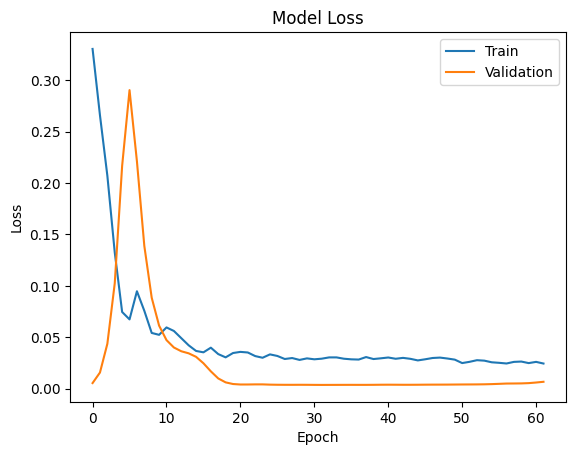

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict the total visitor
prediction=model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

1/1 [==============================] - 0s 312ms/step
prediction
 [[0.00945382]
 [0.00888538]
 [0.00835014]
 [0.00786136]
 [0.00746293]
 [0.00702041]
 [0.00671266]
 [0.00642878]
 [0.00612913]
 [0.00581952]]

Prediction Shape- (10, 1)


In [ ]:
# copies the prediction into 2 dimensional array
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [ ]:
# inverse the scaling of the prediction data
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
prediction_copies_array.shape

(10, 2)

In [ ]:
# inverse the scaling for of the original data
original_copies_array = np.repeat(testY,2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [611.0855  574.3423  539.7448  508.15076 482.39636 453.79218 433.89987
 415.54968 396.181   376.16794]

Original Values--  [ 317.  737. 1203. 1792. 1149. 3120. 2672. 2646. 2511. 4300.]


In [ ]:
# Offset the 0 in original to make it suitable for mape
original = np.where(original == 0, 1, original)

In [ ]:
original

array([ 317.,  737., 1203., 1792., 1149., 3120., 2672., 2646., 2511.,
       4300.])

In [ ]:
# Calculate RMSE, MAPE, MSE
rmse_lstm1 = np.sqrt(mean_squared_error(original, pred))
mae_lstm1 = mean_absolute_error(original, pred)
mape_lstm1 = np.mean(np.abs((original - pred) / original) * 100)
mape_function_lstm1 = mean_absolute_percentage_error(original, pred)
mse_lstm1 = mean_squared_error(original, pred)

print(f"Mean Average Error (MAE): {mae_lstm1}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm1}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm1}")
print(f"Mean Absolute Percentage Error Function (MAPE): {mape_function_lstm1}")
print(f"Mean Squared Error (MSE): {mse_lstm1}")

Mean Average Error (MAE): 1624.3860626220703
Root Mean Squared Error (RMSE): 1990.1523301550824
Mean Absolute Percentage Error (MAPE): 72.86203646725968
Mean Absolute Percentage Error Function (MAPE): 0.7286203646725969
Mean Squared Error (MSE): 3960706.297221704


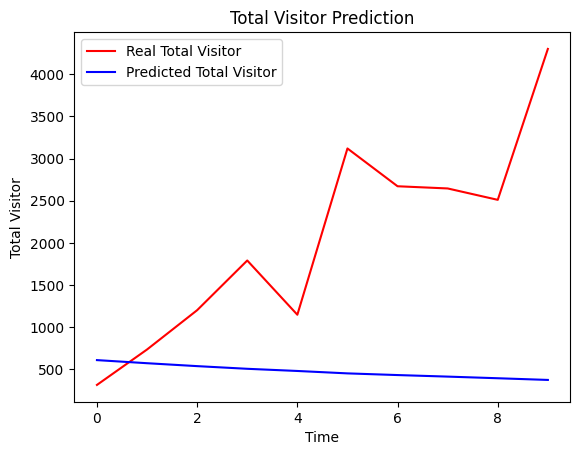

In [ ]:
# plot the prediction
plt.plot(original, color = 'red', label = 'Real Total Visitor')
plt.plot(pred, color = 'blue', label = 'Predicted Total Visitor')
plt.title('Total Visitor Prediction')
plt.xlabel('Time')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()

In [ ]:
# Creating the full data
def createFull(dataset,n_past):
    dataX = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
    return np.array(dataX)
allData=createFull(df_scaled,12)

In [ ]:
# Predict using all the data
prediction=model.predict(allData)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

3/3 [==============================] - 0s 11ms/step
prediction
 [[0.6331523 ]
 [0.6568705 ]
 [0.6746328 ]
 [0.6809148 ]
 [0.6801388 ]
 [0.67751145]
 [0.6738901 ]
 [0.6701501 ]
 [0.666806  ]
 [0.66421133]
 [0.6632204 ]
 [0.6638311 ]
 [0.6661097 ]
 [0.6894773 ]
 [0.70613456]
 [0.71216327]
 [0.71062833]
 [0.70718646]
 [0.70273936]
 [0.6981388 ]
 [0.6940353 ]
 [0.6908595 ]
 [0.68910265]
 [0.6894131 ]
 [0.69200003]
 [0.7160316 ]
 [0.7329927 ]
 [0.74209505]
 [0.7391866 ]
 [0.7346954 ]
 [0.72268057]
 [0.7088616 ]
 [0.6973045 ]
 [0.68311745]
 [0.6667737 ]
 [0.6463631 ]
 [0.6211309 ]
 [0.6165452 ]
 [0.6063162 ]
 [0.5728541 ]
 [0.5428914 ]
 [0.50567305]
 [0.47487763]
 [0.4390872 ]
 [0.39743838]
 [0.37600073]
 [0.35230717]
 [0.33275583]
 [0.32031867]
 [0.32531598]
 [0.31110466]
 [0.28026685]
 [0.24511427]
 [0.20844194]
 [0.1824595 ]
 [0.15010726]
 [0.12124767]
 [0.08896273]
 [0.07475995]
 [0.06348009]
 [0.05388424]
 [0.05436735]
 [0.05419197]
 [0.05282424]
 [0.04958943]
 [0.04626864]
 [0.04237749

In [ ]:
# Reshape the prediction array
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [ ]:
# Inverse the prediction array
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
prediction_copies_array.shape

(96, 2)

In [ ]:
# Inverse the original data
original_copies_array = np.repeat(df_scaled[:,1],2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(df_scaled),2)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [40926.332   42459.453   43607.59    44013.652   43963.492   43793.664
 43559.582   43317.832   43101.67    42933.957   42869.902   42909.38
 43056.664   44567.125   45643.832   46033.523   45934.305   45711.824
 45424.37    45126.992   44861.746   44656.47    44542.906   44562.973
 44730.19    46283.566   47379.914   47968.28    47780.28    47489.973
 46713.348   45820.105   45073.066   44156.027   43099.582   41780.26
 40149.277   39852.863   39191.67    37028.715   35091.957   32686.201
 30695.615   28382.158   25690.02    24304.31    22772.783   21509.004
 20705.078   21028.1     20109.494   18116.17    15843.941   13473.479
 11794.       9702.783    7837.328    5750.4614   4832.408    4103.29
  3483.0232   3514.251    3502.9146   3414.5063   3205.4114   2990.7588
  2739.2388   2488.04     2241.5066   2029.9429   1824.8988   1624.8827
  1423.0665   1245.4545   1132.8473   1053.0563   1009.40814   965.40753
   924.2994    885.30896   844.1062    801.87537   760.3914  

In [ ]:
# Prediction for all the data
num_predictions = len(pred)

# Create a date range starting from January 1st, 2014
date_index = pd.date_range(start='2014-01-01	', periods=num_predictions, freq='MS')

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(pred, columns=['total_visitor'], index=date_index)

# Display the DataFrame
df_test

,total_visitor
2014-01-01,40926.332031
2014-02-01,42459.453125
2014-03-01,43607.589844
2014-04-01,44013.652344
2014-05-01,43963.492188
...,...
2021-08-01,453.792175
2021-09-01,433.899872
2021-10-01,415.549683
2021-11-01,396.181122


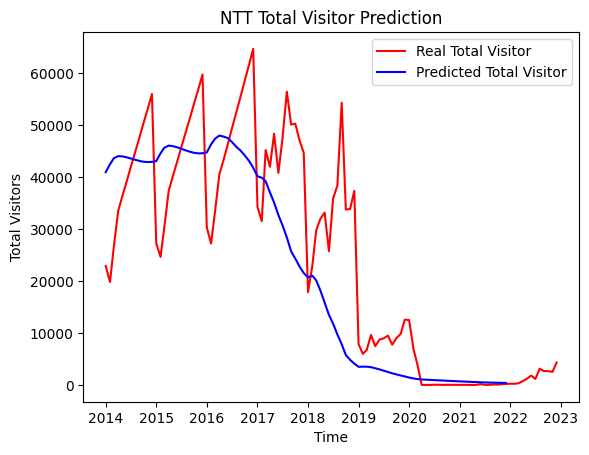

In [ ]:
plt.plot(df['total_visitor'], color = 'red', label = 'Real Total Visitor')
plt.plot(df_test, color = 'blue', label = 'Predicted Total Visitor')
plt.title('NTT Total Visitor Prediction')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

# LSTM (80:20) Prediction

In [ ]:
df_12_months_past=df.iloc[-12:,:]
df_12_months_past.tail()

,total_visitor,total_accomodation
datetime,,
2022-08-01,3120.0,14541
2022-09-01,2672.0,14575
2022-10-01,2646.0,14586
2022-11-01,2511.0,14659
2022-12-01,4300.0,14782


In [ ]:
df_12_months_future = pd.read_csv(uploaded, index_col=[0], parse_dates=['datetime'])
df_12_months_future = df_12_months_future[:12]
df_12_months_future = df_12_months_future.drop('total_visitor', axis=1)
df_12_months_future

,total_accomodation
datetime,
2014-01-01,9024
2014-02-01,9058
2014-03-01,9103
2014-04-01,9187
2014-05-01,9247
2014-06-01,9271
2014-07-01,9348
2014-08-01,9378
2014-09-01,9400


In [ ]:
df_12_months_future["total_visitor"]=0
df_12_months_future=df_12_months_future[["total_visitor","total_accomodation"]]
old_scaled_array=scaler.transform(df_12_months_past)
new_scaled_array=scaler.transform(df_12_months_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [ ]:
full_df.shape

(24, 2)

In [ ]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=12
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 24ms/step


In [ ]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,2, axis=-1)
y_pred_future_12_months = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),2)))[:,0]
print(y_pred_future_12_months)

[ 365.3273   526.92883  811.85114 1194.9656  1650.54    2158.6387
 2717.1038  3393.5542  4223.8105  5346.1523  6911.1284  9030.455  ]


In [ ]:
len(y_pred_future_12_months)

12

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = len(y_pred_future_12_months)

# Create a date range starting from January 1st, 2023
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')

# Create a DataFrame from the predictions array
df_test1 = pd.DataFrame(y_pred_future_12_months, columns=['total_visitor'], index=date_index)

# Display the DataFrame
df_test1

,total_visitor
2023-01-01,365.327301
2023-02-01,526.928833
2023-03-01,811.851135
2023-04-01,1194.965576
2023-05-01,1650.540039
2023-06-01,2158.638672
2023-07-01,2717.103760
2023-08-01,3393.554199
2023-09-01,4223.810547
2023-10-01,5346.152344


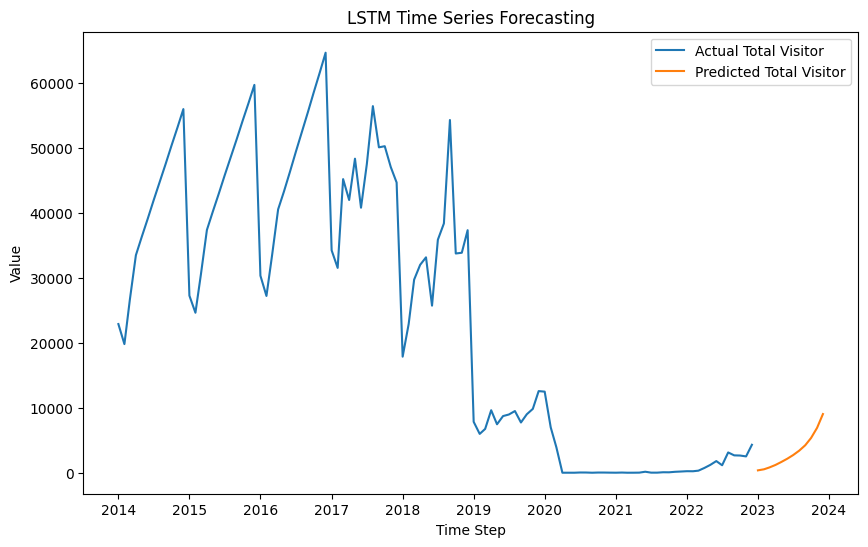

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(df['total_visitor'], label='Actual Total Visitor')
plt.plot(df_test1['total_visitor'], label='Predicted Total Visitor')

plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

# LSTM (70:30) Training

In [ ]:
# The Data Shape
df.shape

(108, 2)

In [ ]:
# Splitting the data
test_split=round(len(df)*0.3)
df_for_training=df[:-test_split]
df_for_testing=df[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(76, 2)
(32, 2)


In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_scaled = scaler.transform(df)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.35398134, 0.        ],
       [0.3062238 , 0.00871125],
       [0.41216603, 0.02024084],
       [0.51792262, 0.04176275],
       [0.56141029, 0.05713554],
       [0.60489797, 0.06328465],
       [0.64838565, 0.08301307],
       [0.69187333, 0.09069946],
       [0.735361  , 0.09633615],
       [0.77884868, 0.1206764 ],
       [0.82233636, 0.12785037],
       [0.86582404, 0.13886754],
       [0.42164947, 0.16115808],
       [0.38091555, 0.1808865 ],
       [0.47174307, 0.1965155 ],
       [0.57804112, 0.20573917],
       [0.62121939, 0.21547528],
       [0.66439765, 0.22495516],
       [0.70757592, 0.23622854],
       [0.75075419, 0.24058417],
       [0.79393246, 0.2469895 ],
       [0.83714166, 0.25851909],
       [0.88028899, 0.2685114 ],
       [0.92346726, 0.27542916],
       [0.46915949, 0.2782475 ],
       [0.42087594, 0.29310787],
       [0.51792262, 0.3151422 ],
       [0.62703631, 0.31847297],
       [0.66959575, 0.34383807],
       [0.71679636, 0.36894696],
       [0.

In [ ]:
# Creating the X & Y
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,12)
testX,testY=createXY(df_for_testing_scaled,12)


In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (64, 12, 2)
trainY Shape--  (64,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.35398134 0.        ]
 [0.3062238  0.00871125]
 [0.41216603 0.02024084]
 [0.51792262 0.04176275]
 [0.56141029 0.05713554]
 [0.60489797 0.06328465]
 [0.64838565 0.08301307]
 [0.69187333 0.09069946]
 [0.735361   0.09633615]
 [0.77884868 0.1206764 ]
 [0.82233636 0.12785037]
 [0.86582404 0.13886754]]
trainY[0]--  0.42164946858707586


In [ ]:
# to reset model
model = 0
model

0

In [ ]:
# Build the LSTM model
model = Sequential()

# Add Layers
model.add(LSTM(80, activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Summary of the Model
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_119 (LSTM)             (None, 12, 80)            26560     
                                                                 
 dropout_17 (Dropout)        (None, 12, 80)            0         
                                                                 
 lstm_120 (LSTM)             (None, 120)               96480     
                                                                 
 dropout_18 (Dropout)        (None, 120)               0         
                                                                 
 dense_61 (Dense)            (None, 1)                 121       
                                                                 
Total params: 123161 (481.10 KB)
Trainable params: 123161 (481.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# To reset history
history = 0

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 [==============================] - 3s 434ms/step - loss: 0.4193 - val_loss: 0.0110
Epoch 2/100
2/2 [==============================] - 0s 66ms/step - loss: 0.3638 - val_loss: 0.0037
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 0.3013 - val_loss: 0.0038
Epoch 4/100
2/2 [==============================] - 0s 52ms/step - loss: 0.2323 - val_loss: 0.0210
Epoch 5/100
2/2 [==============================] - 0s 51ms/step - loss: 0.1549 - val_loss: 0.0830
Epoch 6/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0731 - val_loss: 0.2587
Epoch 7/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0635 - val_loss: 0.4302
Epoch 8/100
2/2 [==============================] - 0s 54ms/step - loss: 0.1009 - val_loss: 0.3395
Epoch 9/100
2/2 [==============================] - 0s 66ms/step - loss: 0.0746 - val_loss: 0.2147
Epoch 10/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0509 - val_loss: 0.1378
Epoch 11/100
2/2 [

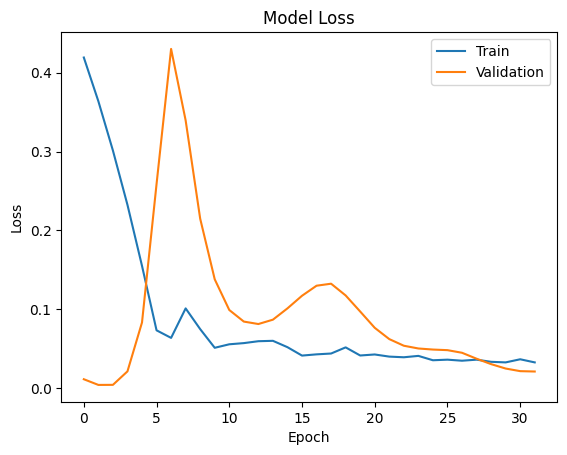

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict the total visitor
prediction=model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

1/1 [==============================] - 0s 488ms/step
prediction
 [[0.10285168]
 [0.10388525]
 [0.10489921]
 [0.10586692]
 [0.10685494]
 [0.10785324]
 [0.10882308]
 [0.10973377]
 [0.11065391]
 [0.11159199]
 [0.11254738]
 [0.11348523]
 [0.11440022]
 [0.11533498]
 [0.11626868]
 [0.11727372]
 [0.11832912]
 [0.11940596]
 [0.12048293]
 [0.12155235]]

Prediction Shape- (20, 1)


In [ ]:
# copies the prediction into 2 dimensional array
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [ ]:
# inverse the scaling of the prediction data
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
prediction_copies_array.shape

(20, 2)

In [ ]:
# inverse the scaling for of the original data
original_copies_array = np.repeat(testY,2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [6648.23   6715.0386 6780.58   6843.1323 6906.996  6971.526  7034.2153
 7093.081  7152.5586 7213.195  7274.9497 7335.572  7394.716  7455.1377
 7515.491  7580.456  7648.676  7718.282  7787.896  7857.0225]

Original Values--  [  13.  152.   12.   12.   73.   64.  142.  184.  234.  226.  317.  737.
 1203. 1792. 1149. 3120. 2672. 2646. 2511. 4300.]


In [ ]:
# Offset the 0 in original to make it suitable for mape
original = np.where(original == 0, 1, original)

In [ ]:
original

array([  13.,  152.,   12.,   12.,   73.,   64.,  142.,  184.,  234.,
        226.,  317.,  737., 1203., 1792., 1149., 3120., 2672., 2646.,
       2511., 4300.])

In [ ]:
# Calculate RMSE, MAPE, MSE
rmse_lstm2 = np.sqrt(mean_squared_error(original, pred))
mae_lstm2 = mean_absolute_error(original, pred)
mape_lstm2 = np.mean(np.abs((original - pred) / original) * 100)
mape_function_lstm2 = mean_absolute_percentage_error(original, pred)
mse_lstm2 = mean_squared_error(original, pred)

print(f"Mean Average Error (MAE): {mae_lstm2}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm2}")
print(f"Mean Absolute Percentage Error Function (MAPE): {mape_function_lstm2}")

print(f"Mean Squared Error (MSE): {mse_lstm2}")

Mean Average Error (MAE): 6168.3875732421875
Root Mean Squared Error (RMSE): 6243.815123496335
Mean Absolute Percentage Error (MAPE): 10439.469641427953
Mean Absolute Percentage Error Function (MAPE): 104.39469641427954
Mean Squared Error (MSE): 38985227.29640156


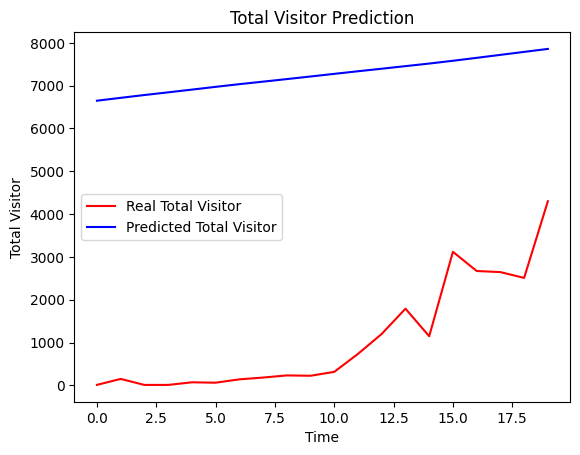

In [ ]:
# plot the prediction
plt.plot(original, color = 'red', label = 'Real Total Visitor')
plt.plot(pred, color = 'blue', label = 'Predicted Total Visitor')
plt.title('Total Visitor Prediction')
plt.xlabel('Time')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()

In [ ]:
# Creating the full data
def createFull(dataset,n_past):
    dataX = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
    return np.array(dataX)
allData=createFull(df_scaled,12)

In [ ]:
# Predict using all the data
prediction=model.predict(allData)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

3/3 [==============================] - 0s 16ms/step
prediction
 [[0.08677982]
 [0.08898228]
 [0.08965231]
 [0.08912034]
 [0.08818626]
 [0.08737772]
 [0.08680252]
 [0.08652028]
 [0.08659986]
 [0.08710045]
 [0.0880717 ]
 [0.08961502]
 [0.09173394]
 [0.09409364]
 [0.09498858]
 [0.0947057 ]
 [0.09383   ]
 [0.09292977]
 [0.0922508 ]
 [0.09193901]
 [0.09209036]
 [0.09278866]
 [0.09412684]
 [0.09598124]
 [0.09836417]
 [0.10118716]
 [0.10274309]
 [0.10348631]
 [0.10344546]
 [0.10330298]
 [0.10275351]
 [0.10219973]
 [0.1021018 ]
 [0.10208616]
 [0.10212393]
 [0.10203584]
 [0.10183962]
 [0.10260938]
 [0.10256702]
 [0.10106371]
 [0.09957913]
 [0.09780092]
 [0.09640367]
 [0.09496676]
 [0.09354209]
 [0.0938147 ]
 [0.09415307]
 [0.09477066]
 [0.09560629]
 [0.09682663]
 [0.09722339]
 [0.09689067]
 [0.09605253]
 [0.09486663]
 [0.09386767]
 [0.09243498]
 [0.09110061]
 [0.08913039]
 [0.08868141]
 [0.08848897]
 [0.08854897]
 [0.08974087]
 [0.09087969]
 [0.09182192]
 [0.0925954 ]
 [0.0932949 ]
 [0.09401558

In [ ]:
# Reshape the prediction array
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [ ]:
# Inverse the prediction array
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
prediction_copies_array.shape

(96, 2)

In [ ]:
# Inverse the original data
original_copies_array = np.repeat(df_scaled[:,1],2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(df_scaled),2)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [5609.361  5751.726  5795.0356 5760.6494 5700.2715 5648.0083 5610.828
 5592.584  5597.7285 5630.086  5692.866  5792.625  5929.5903 6082.1187
 6139.9673 6121.6816 6065.0776 6006.8877 5962.9995 5942.8457 5952.629
 5997.766  6084.265  6204.1313 6358.1616 6540.637  6641.2104 6689.2515
 6686.6113 6677.4014 6641.8843 6606.0884 6599.7583 6598.7476 6601.189
 6595.4946 6582.8115 6632.568  6629.83   6532.6567 6436.696  6321.7534
 6231.4365 6138.5566 6046.4673 6064.0884 6085.9604 6125.881  6179.895
 6258.7764 6284.423  6262.9155 6208.7397 6132.084  6067.5127 5974.905
 5888.6523 5761.2993 5732.2773 5719.8384 5723.717  5800.7603 5874.372
 5935.2773 5985.274  6030.489  6077.0728 6126.0654 6175.597  6227.698
 6277.0273 6331.882  6386.176  6444.38   6510.4775 6580.092  6648.23
 6715.0386 6780.58   6843.1323 6906.996  6971.526  7034.2153 7093.081
 7152.5586 7213.195  7274.9497 7335.572  7394.716  7455.1377 7515.491
 7580.456  7648.676  7718.282  7787.896  7857.0225]

Original Values--  [

In [ ]:
# Prediction for all the data
num_predictions = len(pred)

# Create a date range starting from January 1st, 2014
date_index = pd.date_range(start='2014-01-01	', periods=num_predictions, freq='MS')

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(pred, columns=['total_visitor'], index=date_index)

# Display the DataFrame
df_test

,total_visitor
2014-01-01,5609.360840
2014-02-01,5751.726074
2014-03-01,5795.035645
2014-04-01,5760.649414
2014-05-01,5700.271484
...,...
2021-08-01,7580.456055
2021-09-01,7648.675781
2021-10-01,7718.282227
2021-11-01,7787.895996


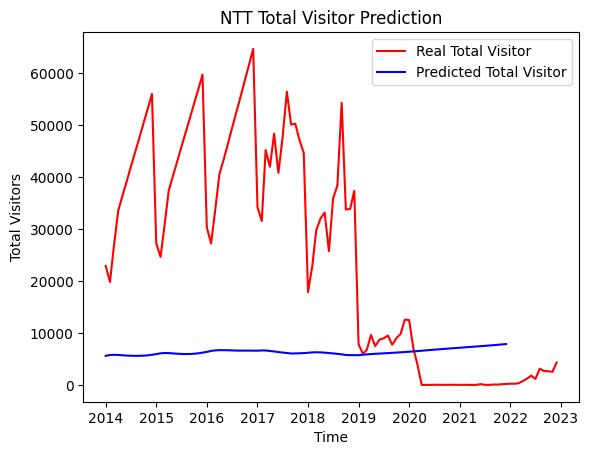

In [ ]:
plt.plot(df['total_visitor'], color = 'red', label = 'Real Total Visitor')
plt.plot(df_test, color = 'blue', label = 'Predicted Total Visitor')
plt.title('NTT Total Visitor Prediction')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

# LSTM (70:30) Prediction

In [ ]:
df_12_months_past=df.iloc[-12:,:]
df_12_months_past.tail()

,total_visitor,total_accomodation
datetime,,
2022-08-01,3120.0,14541
2022-09-01,2672.0,14575
2022-10-01,2646.0,14586
2022-11-01,2511.0,14659
2022-12-01,4300.0,14782


In [ ]:
df_12_months_future = pd.read_csv(uploaded, index_col=[0], parse_dates=['datetime'])
df_12_months_future = df_12_months_future[:12]
df_12_months_future = df_12_months_future.drop('total_visitor', axis=1)
df_12_months_future

,total_accomodation
datetime,
2014-01-01,9024
2014-02-01,9058
2014-03-01,9103
2014-04-01,9187
2014-05-01,9247
2014-06-01,9271
2014-07-01,9348
2014-08-01,9378
2014-09-01,9400


In [ ]:
df_12_months_future["total_visitor"]=0
df_12_months_future=df_12_months_future[["total_visitor","total_accomodation"]]
old_scaled_array=scaler.transform(df_12_months_past)
new_scaled_array=scaler.transform(df_12_months_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [ ]:
full_df.shape

(24, 2)

In [ ]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=12
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 23ms/step


In [ ]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,2, axis=-1)
y_pred_future_12_months = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),2)))[:,0]
print(y_pred_future_12_months)

[7927.1978 7790.8594 7481.6294 7045.4414 6526.7466 5964.747  5389.024
 4818.3086 4274.851  3776.1584 3343.657  2997.8198]


In [ ]:
len(y_pred_future_12_months)

12

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = len(y_pred_future_12_months)

# Create a date range starting from January 1st, 2023
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')

# Create a DataFrame from the predictions array
df_test2 = pd.DataFrame(y_pred_future_12_months, columns=['total_visitor'], index=date_index)

# Display the DataFrame
df_test2

,total_visitor
2023-01-01,7927.197754
2023-02-01,7790.859375
2023-03-01,7481.629395
2023-04-01,7045.441406
2023-05-01,6526.746582
2023-06-01,5964.747070
2023-07-01,5389.023926
2023-08-01,4818.308594
2023-09-01,4274.851074
2023-10-01,3776.158447


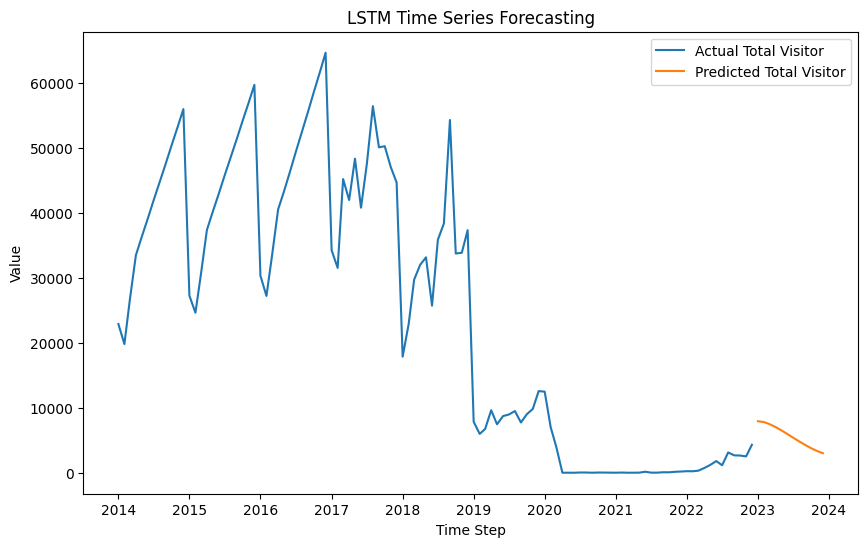

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(df['total_visitor'], label='Actual Total Visitor')
plt.plot(df_test2['total_visitor'], label='Predicted Total Visitor')

plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

# LSTM (60:40) Training

In [ ]:
# The Data Shape
df.shape

(108, 2)

In [ ]:
# Splitting the data
test_split=round(len(df)*0.4)
df_for_training=df[:-test_split]
df_for_testing=df[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(65, 2)
(43, 2)


In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_scaled = scaler.transform(df)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.28820782, 0.        ],
       [0.2355879 , 0.01037851],
       [0.3523165 , 0.02411477],
       [0.46884056, 0.0497558 ],
       [0.51675587, 0.06807082],
       [0.56467119, 0.07539683],
       [0.61258651, 0.0989011 ],
       [0.66050182, 0.10805861],
       [0.70841714, 0.11477411],
       [0.75633246, 0.14377289],
       [0.80424778, 0.1523199 ],
       [0.85216309, 0.16544567],
       [0.36276549, 0.19200244],
       [0.31788429, 0.21550672],
       [0.41795929, 0.23412698],
       [0.53507994, 0.245116  ],
       [0.58265435, 0.25671551],
       [0.63022875, 0.26800977],
       [0.67780316, 0.28144078],
       [0.72537756, 0.28663004],
       [0.77295197, 0.29426129],
       [0.82056046, 0.30799756],
       [0.86810077, 0.31990232],
       [0.91567518, 0.32814408],
       [0.41511267, 0.33150183],
       [0.3619132 , 0.34920635],
       [0.46884056, 0.37545788],
       [0.58906351, 0.37942613],
       [0.63595609, 0.40964591],
       [0.68796236, 0.43956044],
       [0.

In [ ]:
# Creating the X & Y
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,12)
testX,testY=createXY(df_for_testing_scaled,12)


In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (53, 12, 2)
trainY Shape--  (53,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.28820782 0.        ]
 [0.2355879  0.01037851]
 [0.3523165  0.02411477]
 [0.46884056 0.0497558 ]
 [0.51675587 0.06807082]
 [0.56467119 0.07539683]
 [0.61258651 0.0989011 ]
 [0.66050182 0.10805861]
 [0.70841714 0.11477411]
 [0.75633246 0.14377289]
 [0.80424778 0.1523199 ]
 [0.85216309 0.16544567]]
trainY[0]--  0.3627654859714315


In [ ]:
# to reset model
model = 0
model

0

In [ ]:
# Build the LSTM model
model = Sequential()

# Add Layers
model.add(LSTM(80, activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Summary of the Model
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_121 (LSTM)             (None, 12, 80)            26560     
                                                                 
 dropout_19 (Dropout)        (None, 12, 80)            0         
                                                                 
 lstm_122 (LSTM)             (None, 120)               96480     
                                                                 
 dropout_20 (Dropout)        (None, 120)               0         
                                                                 
 dense_62 (Dense)            (None, 1)                 121       
                                                                 
Total params: 123161 (481.10 KB)
Trainable params: 123161 (481.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# To reset history
history = 0

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 [==============================] - 3s 402ms/step - loss: 0.3915 - val_loss: 0.1362
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 0.3422 - val_loss: 0.1127
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 0.2889 - val_loss: 0.0914
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 0.2321 - val_loss: 0.0832
Epoch 5/100
2/2 [==============================] - 0s 45ms/step - loss: 0.1600 - val_loss: 0.1147
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0938 - val_loss: 0.2531
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0539 - val_loss: 0.5184
Epoch 8/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0986 - val_loss: 0.4826
Epoch 9/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0771 - val_loss: 0.3342
Epoch 10/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0573 - val_loss: 0.2264
Epoch 11/100
2/2 [

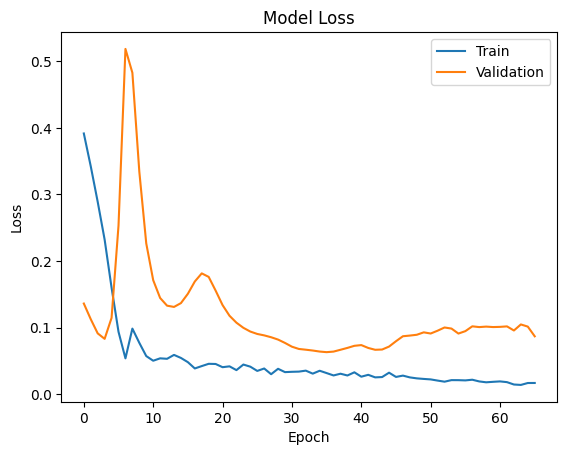

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict the total visitor
prediction=model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

1/1 [==============================] - 0s 458ms/step
prediction
 [[0.14651401]
 [0.1446277 ]
 [0.14269564]
 [0.14068282]
 [0.13902476]
 [0.13725388]
 [0.13531524]
 [0.1329351 ]
 [0.13078348]
 [0.12960668]
 [0.12884131]
 [0.12865034]
 [0.12843354]
 [0.12826158]
 [0.1281133 ]
 [0.12791838]
 [0.12770581]
 [0.12745886]
 [0.12723936]
 [0.12706813]
 [0.12695934]
 [0.12687656]
 [0.12679678]
 [0.12669173]
 [0.1266022 ]
 [0.12663504]
 [0.12667787]
 [0.12684783]
 [0.12701674]
 [0.12714753]
 [0.127231  ]]

Prediction Shape- (31, 1)


In [ ]:
# copies the prediction into 2 dimensional array
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [ ]:
# inverse the scaling of the prediction data
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
prediction_copies_array.shape

(31, 2)

In [ ]:
# inverse the scaling for of the original data
original_copies_array = np.repeat(testY,2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [14568.392  14457.7295 14344.382  14226.298  14129.027  14025.137
 13911.404  13771.771  13645.544  13576.506  13531.6045 13520.4
 13507.683  13497.594  13488.895  13477.46   13464.989  13450.501
 13437.624  13427.579  13421.196  13416.341  13411.66   13405.497
 13400.245  13402.172  13404.685  13414.655  13424.564  13432.237
 13437.134 ]

Original Values--  [0.000e+00 3.500e+01 3.100e+01 0.000e+00 2.800e+01 2.600e+01 1.300e+01
 4.000e+00 2.600e+01 0.000e+00 3.000e+00 1.300e+01 1.520e+02 1.200e+01
 1.200e+01 7.300e+01 6.400e+01 1.420e+02 1.840e+02 2.340e+02 2.260e+02
 3.170e+02 7.370e+02 1.203e+03 1.792e+03 1.149e+03 3.120e+03 2.672e+03
 2.646e+03 2.511e+03 4.300e+03]


In [ ]:
# Offset the 0 in original to make it suitable for mape
original = np.where(original == 0, 1, original)

In [ ]:
original

array([1.000e+00, 3.500e+01, 3.100e+01, 1.000e+00, 2.800e+01, 2.600e+01,
       1.300e+01, 4.000e+00, 2.600e+01, 1.000e+00, 3.000e+00, 1.300e+01,
       1.520e+02, 1.200e+01, 1.200e+01, 7.300e+01, 6.400e+01, 1.420e+02,
       1.840e+02, 2.340e+02, 2.260e+02, 3.170e+02, 7.370e+02, 1.203e+03,
       1.792e+03, 1.149e+03, 3.120e+03, 2.672e+03, 2.646e+03, 2.511e+03,
       4.300e+03])

In [ ]:
# Calculate RMSE, MAPE, MSE
rmse_lstm3 = np.sqrt(mean_squared_error(original, pred))
mae_lstm3 = mean_absolute_error(original, pred)
mape_lstm3 = np.mean(np.abs((original - pred) / original) * 100)
mape_function_lstm3 = mean_absolute_percentage_error(original, pred)
mse_lstm3 = mean_squared_error(original, pred)

print(f"Mean Average Error (MAE): {mae_lstm3}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm3}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm3}")
print(f"Mean Absolute Percentage Error Function (MAPE): {mape_function_lstm3}")
print(f"Mean Squared Error (MSE): {mse_lstm3}")

Mean Average Error (MAE): 12945.255040322581
Root Mean Squared Error (RMSE): 13011.76116087977
Mean Absolute Percentage Error (MAPE): 187030.39356308294
Mean Absolute Percentage Error Function (MAPE): 1870.303935630829
Mean Squared Error (MSE): 169305928.50777927


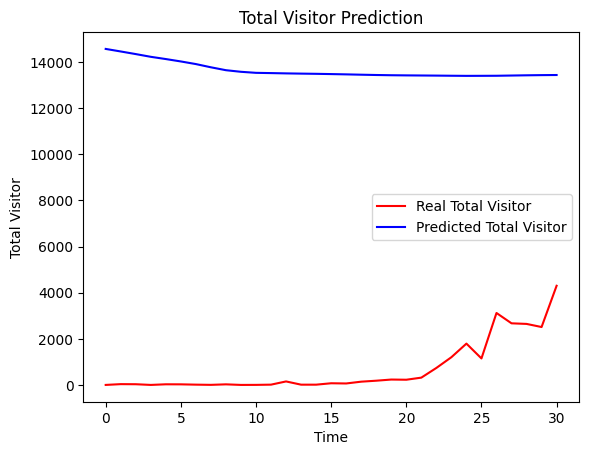

In [ ]:
# plot the prediction
plt.plot(original, color = 'red', label = 'Real Total Visitor')
plt.plot(pred, color = 'blue', label = 'Predicted Total Visitor')
plt.title('Total Visitor Prediction')
plt.xlabel('Time')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()

In [ ]:
# # Creating the X & Y
# def createXY(dataset,n_past):
#     dataX = []
#     dataY = []
#     for i in range(n_past, len(dataset)):
#             dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
#             dataY.append(dataset[i,0])
#     return np.array(dataX),np.array(dataY)
# trainX,trainY=createXY(df_for_training_scaled,12)
# testX,testY=createXY(df_for_testing_scaled,12)


# Creating the full data
def createFull(dataset,n_past):
    dataX = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
    return np.array(dataX)
allData=createFull(df_scaled,12)

In [ ]:
# Predict using all the data
prediction=model.predict(allData)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

3/3 [==============================] - 0s 15ms/step
prediction
 [[0.6375105 ]
 [0.6604398 ]
 [0.67995924]
 [0.688796  ]
 [0.69033617]
 [0.68970424]
 [0.687436  ]
 [0.68475294]
 [0.6817748 ]
 [0.67775947]
 [0.67305154]
 [0.66586405]
 [0.6528512 ]
 [0.6757135 ]
 [0.6968859 ]
 [0.70699745]
 [0.70814043]
 [0.7071192 ]
 [0.7049913 ]
 [0.70260733]
 [0.69955426]
 [0.69504184]
 [0.6865204 ]
 [0.6711956 ]
 [0.65274054]
 [0.6785932 ]
 [0.7037694 ]
 [0.71718365]
 [0.7148437 ]
 [0.70995295]
 [0.69713813]
 [0.6792574 ]
 [0.65933275]
 [0.63417536]
 [0.60216975]
 [0.5598401 ]
 [0.50975627]
 [0.5123471 ]
 [0.51353335]
 [0.48439267]
 [0.46012762]
 [0.4262576 ]
 [0.40612662]
 [0.37603953]
 [0.33742747]
 [0.31887594]
 [0.30048352]
 [0.2864962 ]
 [0.2774117 ]
 [0.2812084 ]
 [0.27736202]
 [0.265473  ]
 [0.25077647]
 [0.23445433]
 [0.22507627]
 [0.20955144]
 [0.19468687]
 [0.17187458]
 [0.16325751]
 [0.15590413]
 [0.14830525]
 [0.1490537 ]
 [0.14959629]
 [0.14940864]
 [0.14790703]
 [0.14651401]
 [0.1446277 

In [ ]:
# Reshape the prediction array
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [ ]:
# Inverse the prediction array
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
prediction_copies_array.shape

(96, 2)

In [ ]:
# Inverse the original data
original_copies_array = np.repeat(df_scaled[:,1],2, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(df_scaled),2)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [43373.19   44718.363  45863.49   46381.906  46472.26   46435.19
 46302.12   46144.72   45970.     45734.438  45458.242  45036.582
 44273.17   45614.406  46856.508  47449.715  47516.77   47456.86
 47332.02   47192.164  47013.05   46748.324  46248.406  45349.363
 44266.676  45783.35   47260.336  48047.297  47910.02   47623.1
 46871.305  45822.316  44653.418  43177.53   41299.89   38816.58
 35878.363  36030.355  36099.95   34390.38   32966.848  30979.83
 29798.824  28033.734  25768.52   24680.176  23601.166  22780.584
 22247.635  22470.371  22244.719  21547.238  20685.05   19727.498
 19177.324  18266.545  17394.5    16056.193  15550.664  15119.271
 14673.476  14717.383  14749.216  14738.206  14650.114  14568.392
 14457.7295 14344.382  14226.298  14129.027  14025.137  13911.404
 13771.771  13645.544  13576.506  13531.6045 13520.4    13507.683
 13497.594  13488.895  13477.46   13464.989  13450.501  13437.624
 13427.579  13421.196  13416.341  13411.66   13405.497  13400.245
 

In [ ]:
# Prediction for all the data
num_predictions = len(pred)

# Create a date range starting from January 1st, 2014
date_index = pd.date_range(start='2014-01-01	', periods=num_predictions, freq='MS')

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(pred, columns=['total_visitor'], index=date_index)

# Display the DataFrame
df_test

,total_visitor
2014-01-01,43373.191406
2014-02-01,44718.363281
2014-03-01,45863.488281
2014-04-01,46381.906250
2014-05-01,46472.261719
...,...
2021-08-01,13404.684570
2021-09-01,13414.655273
2021-10-01,13424.564453
2021-11-01,13432.237305


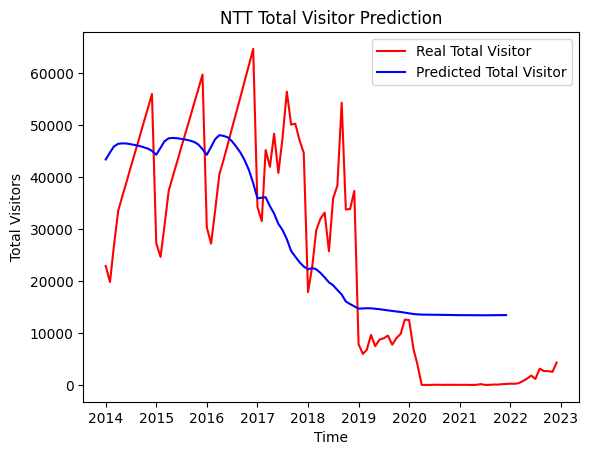

In [ ]:
plt.plot(df['total_visitor'], color = 'red', label = 'Real Total Visitor')
plt.plot(df_test, color = 'blue', label = 'Predicted Total Visitor')
plt.title('NTT Total Visitor Prediction')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

# LSTM (60:40) Prediction

In [ ]:
df_12_months_past=df.iloc[-12:,:]
df_12_months_past.tail()

,total_visitor,total_accomodation
datetime,,
2022-08-01,3120.0,14541
2022-09-01,2672.0,14575
2022-10-01,2646.0,14586
2022-11-01,2511.0,14659
2022-12-01,4300.0,14782


In [ ]:
df_12_months_future = pd.read_csv(uploaded, index_col=[0], parse_dates=['datetime'])
df_12_months_future = df_12_months_future[:12]
df_12_months_future = df_12_months_future.drop('total_visitor', axis=1)
df_12_months_future

,total_accomodation
datetime,
2014-01-01,9024
2014-02-01,9058
2014-03-01,9103
2014-04-01,9187
2014-05-01,9247
2014-06-01,9271
2014-07-01,9348
2014-08-01,9378
2014-09-01,9400


In [ ]:
df_12_months_future["total_visitor"]=0
df_12_months_future=df_12_months_future[["total_visitor","total_accomodation"]]
old_scaled_array=scaler.transform(df_12_months_past)
new_scaled_array=scaler.transform(df_12_months_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [ ]:
full_df.shape

(24, 2)

In [ ]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=12
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 37ms/step


In [ ]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,2, axis=-1)
y_pred_future_12_months = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),2)))[:,0]
print(y_pred_future_12_months)

[13450.906 13366.284 13253.237 13184.668 13194.617 13310.441 13538.332
 13975.043 14816.557 16269.61  18601.25  22283.855]


In [ ]:
len(y_pred_future_12_months)

12

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = len(y_pred_future_12_months)

# Create a date range starting from January 1st, 2023
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')

# Create a DataFrame from the predictions array
df_test3 = pd.DataFrame(y_pred_future_12_months, columns=['total_visitor'], index=date_index)

# Display the DataFrame
df_test3

,total_visitor
2023-01-01,13450.906250
2023-02-01,13366.284180
2023-03-01,13253.237305
2023-04-01,13184.667969
2023-05-01,13194.617188
2023-06-01,13310.441406
2023-07-01,13538.332031
2023-08-01,13975.042969
2023-09-01,14816.556641
2023-10-01,16269.610352


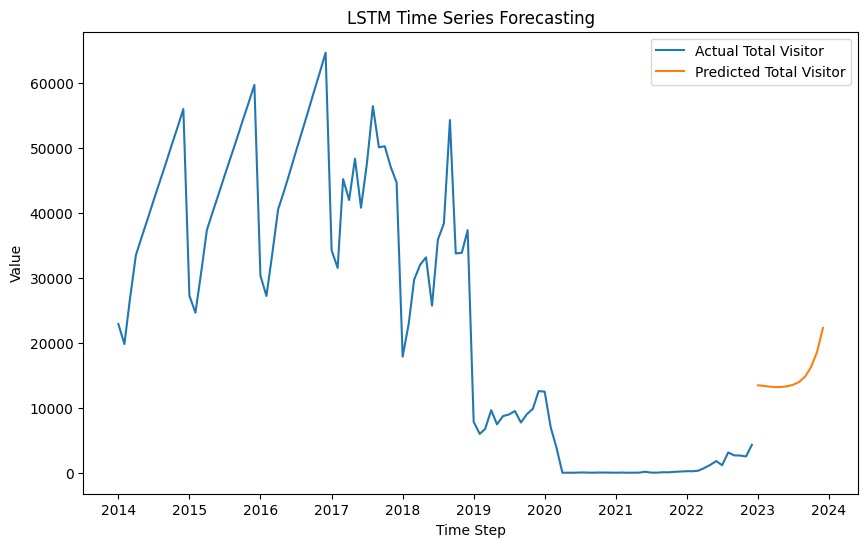

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(df['total_visitor'], label='Actual Total Visitor')
plt.plot(df_test3['total_visitor'], label='Predicted Total Visitor')

plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

# LSTM Model Accuracy Comparation


In [ ]:
# Preparing all the accuracy data
data = {
    'Model': ['80:20 LSTM', '70:30 LSTM', '60:40 LSTM'],
    'RMSE': [rmse_lstm1, rmse_lstm2, rmse_lstm3],
    'MAE': [mae_lstm1, mae_lstm2, mae_lstm3],
    'MAPE': [mape_lstm1, mape_lstm2, mape_lstm3],
    'MAPE (Function)': [mape_function_lstm1, mape_function_lstm2, mape_function_lstm3],
    'MSE': [mse_lstm1, mse_lstm2, mse_lstm3]
}

# Round up all numerical columns
for col in ['RMSE', 'MAE', 'MAPE', 'MSE']:
    data[col] = [round(val, 3) for val in data[col]]

# Round up and append '%' to MAPE (Function) column
data['MAPE (Function)'] = [str(round(val, 3)) + '%' for val in data['MAPE (Function)']]

# Create the DataFrame
df_acc = pd.DataFrame(data)
df_acc

,Model,RMSE,MAE,MAPE,MAPE (Function),MSE
0,80:20 LSTM,1990.152,1624.386,72.862,0.729%,3.960706e+06
1,70:30 LSTM,6243.815,6168.388,10439.470,104.395%,3.898523e+07
2,60:40 LSTM,13011.761,12945.255,187030.394,1870.304%,1.693059e+08


# All Prediction in one plot

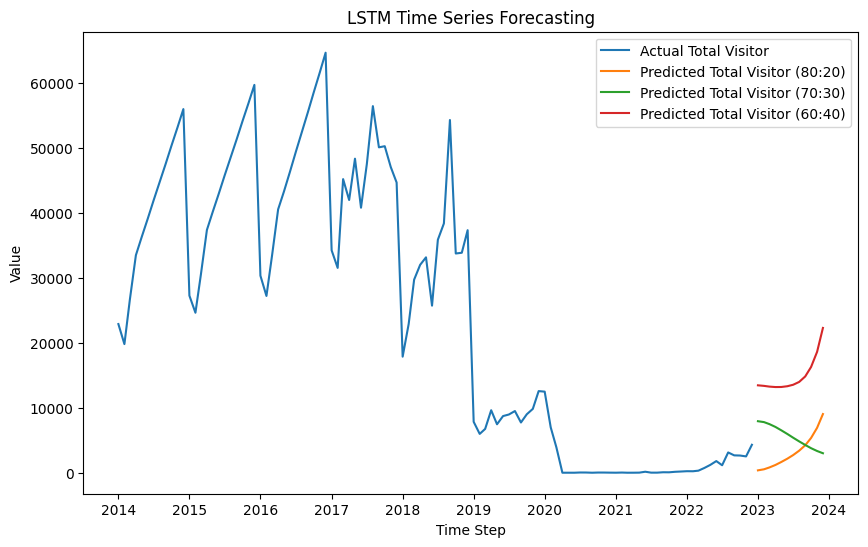

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(df['total_visitor'], label='Actual Total Visitor')
plt.plot(df_test1['total_visitor'], label='Predicted Total Visitor (80:20)')
plt.plot(df_test2['total_visitor'], label='Predicted Total Visitor (70:30)')
plt.plot(df_test3['total_visitor'], label='Predicted Total Visitor (60:40)')

plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()